# Lab-3

Name: Purusharth Malik

Registration No.: 2348542

### Question 1

Number of iterations taken to converge using momentum: 6


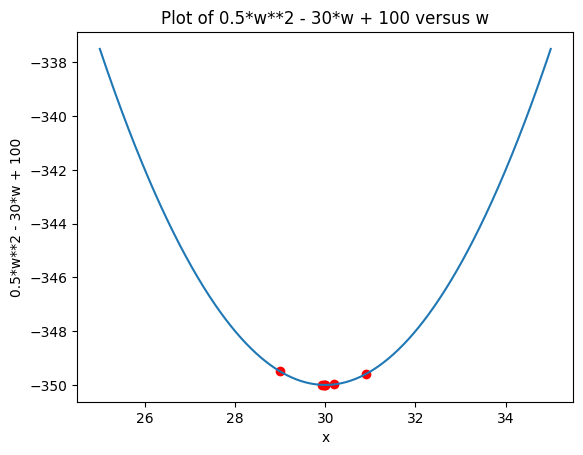

Minimum value of w: 30.003059
Minimum cost: -349.999995321259


In [84]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt

# Create the symbol
w = sp.symbols("w")

# Create the function
f_w = 0.5*w**2-30*w+100

# Prepare the function for numerical evaluations
grad_f = sp.lambdify(w, sp.diff(f_w, w))  # Use diff instead of derive_by_array

# Gradient Descent parameters
alpha = 0.1  # Learning Rate
momentum = 0.9 # Momentum
prev_grad = 0 # Value of the previous gradient
iterations = 100  # Number of iterations

# Given starting point
starting_point = 20.0
x_descent, y_descent = [], []

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = grad_f(starting_point)
    # Update x using the Gradient Descent formula while adjusting for momentum
    starting_point -= (momentum * grad + alpha * prev_grad)
    # Keeping track of the starting points for every iteration
    x_descent.append(starting_point)
    y_descent.append(f_w.subs(w, starting_point))
    # Updating the value of previous gradient
    prev_grad = grad
    # Checking for convergence
    if abs(grad) < 0.02:
        print(f"Number of iterations taken to converge using momentum: {i}")
        break

# The value of x after optimization represents the minimum of the cost function
minimum_w = starting_point
# Evaluate f_x at the minimum
minimum_cost = f_w.subs(w, minimum_w)

# Define the function for plotting
def cost_function(w):
    return 0.5*w**2-30*w+100

# Create an array of w values
w = np.linspace(25, 35, 1000)
# Evaluate f(x) for each value of x
y = cost_function(w)

# Plot f(x) versus x
plt.plot(w, y)
plt.scatter(x_descent, y_descent, c='r')

# Add labels and a title to the plot
plt.xlabel('x')
plt.ylabel(f_w)
plt.title(f'Plot of {f_w} versus w')

# Display the plot
plt.show()

# Print the result
print(f"Minimum value of w: {minimum_w}")
print(f"Minimum cost: {minimum_cost}")

### Question 2

We are choosing Kaggle's Heart Disease Dataset.

In [141]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('heart.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [142]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Since the features have different scales, we will have to perform feature scaling.

In [143]:
y = df['target']
df.drop('target', axis=1, inplace=True)

In [144]:
# Standardization
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_cols = ['sex', 'cp', 'restecg', 'ca', 'thal']

num_df = df.drop(cat_cols, axis=1)

ss = StandardScaler()
num_std = pd.DataFrame(ss.fit_transform(num_df), columns=num_df.columns)

# Encoding categorical features
ohe = OneHotEncoder(drop='first')
col_enc = pd.DataFrame(ohe.fit_transform(df[cat_cols]).toarray())

# Merging the dataframes
df = pd.concat([num_std, col_enc], axis=1)

df.describe()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,0,1,...,3,4,5,6,7,8,9,10,11,12
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1025.000000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,-3.431402e-16,-7.036106e-16,-3.466062e-18,-4.159275e-17,-4.332578e-16,-7.625337e-17,-2.426243e-16,1.854343e-16,0.695610,0.162927,...,0.075122,0.500488,0.014634,0.220488,0.130732,0.067317,0.017561,0.062439,0.530732,0.400000
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,0.460373,0.369479,...,0.263717,0.500244,0.120142,0.414778,0.337271,0.250693,0.131413,0.242069,0.499298,0.490137
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-4.188779e-01,-3.397080e+00,-7.122871e-01,-9.123291e-01,-2.243675e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.095548e-01,-6.632165e-01,-6.787242e-01,-4.188779e-01,-7.442713e-01,-7.122871e-01,-9.123291e-01,-6.241209e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.726817e-01,-9.205458e-02,-1.163527e-01,-4.188779e-01,1.255019e-01,-7.122871e-01,-2.311765e-01,-6.241209e-01,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.240794e-01,4.791073e-01,5.623715e-01,-4.188779e-01,7.343432e-01,1.403928e+00,6.202642e-01,9.954333e-01,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.488552e+00,3.906079e+00,6.166694e+00,2.387330e+00,2.299935e+00,1.403928e+00,4.366603e+00,9.954333e-01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
df

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,0,1,...,3,4,5,6,7,8,9,10,11,12
0,-0.268437,-0.377636,-0.659332,-0.418878,0.821321,-0.712287,-0.060888,0.995433,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.158157,0.479107,-0.833861,2.387330,0.255968,1.403928,1.727137,-2.243675,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,0.764688,-1.396233,-0.418878,-1.048692,1.403928,1.301417,-2.243675,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,0.936037,-0.833861,-0.418878,0.516900,-0.712287,-0.912329,0.995433,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.364875,0.930822,2.387330,-1.874977,-0.712287,0.705408,-0.624121,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,-0.418878,0.647366,1.403928,-0.912329,0.995433,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,0.613800,-0.377636,0.232705,-0.418878,-0.352873,1.403928,1.471705,-0.624121,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,-0.819834,-1.234378,0.562371,-0.418878,-1.353113,1.403928,-0.060888,-0.624121,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,-0.488996,-1.234378,0.155137,-0.418878,0.429923,-0.712287,-0.912329,0.995433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The features have now been scaled and encoded. We will now split the dataset into training, validation, and testing sets.

In [146]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.33,
                                                  random_state=42,
                                                  stratify=y_train)

In [147]:
# Converting labels to vectors
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [148]:
# Looking at the shapes of the sets
X_train.shape, X_test.shape

((549, 21), (205, 21))

### Creating a model with no regularization

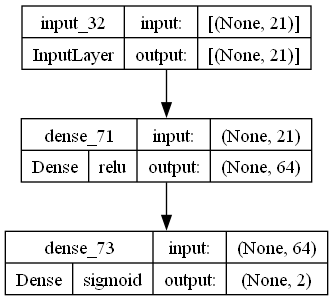

In [161]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(21,))
hidden_1 = Dense(64, activation=tf.nn.relu)(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu)(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

plot_model(model, show_layer_names=True, show_shapes=True, show_layer_activations=True)

In [162]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 0.6477 - categorical_accuracy: 0.6594 - val_loss: 0.5883 - val_categorical_accuracy: 0.7491
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5696 - categorical_accuracy: 0.7268 - val_loss: 0.5241 - val_categorical_accuracy: 0.8155
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5151 - categorical_accuracy: 0.7614 - val_loss: 0.4807 - val_categorical_accuracy: 0.8081
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4746 - categorical_accuracy: 0.7814 - val_loss: 0.4467 - val_categorical_accuracy: 0.8266
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4420 - categorical_accuracy: 0.8069 - val_loss: 0.4230 - val_categorical_accuracy: 0.8303
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4178 - categorical_accuracy: 0.8179 - val_loss: 0.4074 - val_categorical_accuracy: 0.8192
Epoch 7/2

18/18 [==============================] - 0s 5ms/step - loss: 0.1770 - categorical_accuracy: 0.9344 - val_loss: 0.2850 - val_categorical_accuracy: 0.8856
Epoch 51/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1745 - categorical_accuracy: 0.9417 - val_loss: 0.2845 - val_categorical_accuracy: 0.8819
Epoch 52/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1720 - categorical_accuracy: 0.9399 - val_loss: 0.2823 - val_categorical_accuracy: 0.8893
Epoch 53/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1703 - categorical_accuracy: 0.9344 - val_loss: 0.2815 - val_categorical_accuracy: 0.8782
Epoch 54/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1678 - categorical_accuracy: 0.9399 - val_loss: 0.2807 - val_categorical_accuracy: 0.8819
Epoch 55/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1652 - categorical_accuracy: 0.9417 - val_loss: 0.2779 - val_categorical_accuracy: 0.8856
Epoch 56/200
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.0950 - categorical_accuracy: 0.9818 - val_loss: 0.2394 - val_categorical_accuracy: 0.9336
Epoch 100/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0937 - categorical_accuracy: 0.9854 - val_loss: 0.2380 - val_categorical_accuracy: 0.9299
Epoch 101/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0927 - categorical_accuracy: 0.9836 - val_loss: 0.2360 - val_categorical_accuracy: 0.9336
Epoch 102/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0913 - categorical_accuracy: 0.9872 - val_loss: 0.2335 - val_categorical_accuracy: 0.9336
Epoch 103/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0908 - categorical_accuracy: 0.9836 - val_loss: 0.2342 - val_categorical_accuracy: 0.9299
Epoch 104/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0893 - categorical_accuracy: 0.9854 - val_loss: 0.2329 - val_categorical_accuracy: 0.9336
Epoch 105/20

18/18 [==============================] - 0s 5ms/step - loss: 0.0552 - categorical_accuracy: 0.9945 - val_loss: 0.2031 - val_categorical_accuracy: 0.9520
Epoch 149/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0561 - categorical_accuracy: 0.9927 - val_loss: 0.2052 - val_categorical_accuracy: 0.9557
Epoch 150/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0548 - categorical_accuracy: 0.9927 - val_loss: 0.2072 - val_categorical_accuracy: 0.9483
Epoch 151/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0538 - categorical_accuracy: 0.9927 - val_loss: 0.2059 - val_categorical_accuracy: 0.9557
Epoch 152/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0528 - categorical_accuracy: 0.9909 - val_loss: 0.2065 - val_categorical_accuracy: 0.9520
Epoch 153/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0523 - categorical_accuracy: 0.9927 - val_loss: 0.2078 - val_categorical_accuracy: 0.9557
Epoch 154/20

18/18 [==============================] - 0s 5ms/step - loss: 0.0338 - categorical_accuracy: 0.9982 - val_loss: 0.2025 - val_categorical_accuracy: 0.9742
Epoch 198/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0331 - categorical_accuracy: 0.9982 - val_loss: 0.2026 - val_categorical_accuracy: 0.9742
Epoch 199/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0325 - categorical_accuracy: 0.9982 - val_loss: 0.2066 - val_categorical_accuracy: 0.9742
Epoch 200/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0321 - categorical_accuracy: 0.9982 - val_loss: 0.2051 - val_categorical_accuracy: 0.9742


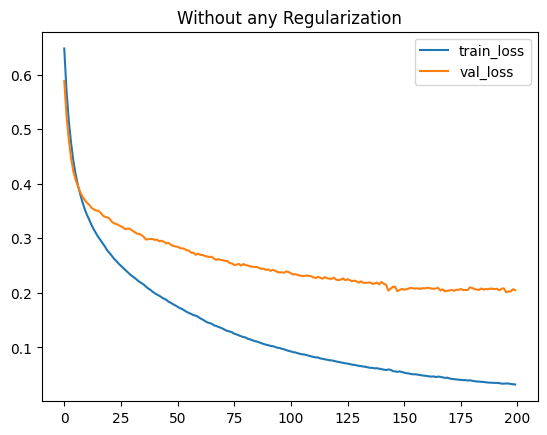

In [163]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Without any Regularization')
plt.legend()
plt.show()

Clearly, the data is overfitting the model. Let us see if regularization can help us make the model better.

### L1 Regularization

In [164]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(21,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_l1 = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 2.3023 - categorical_accuracy: 0.5319 - val_loss: 2.1552 - val_categorical_accuracy: 0.6494
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 2.0560 - categorical_accuracy: 0.7031 - val_loss: 1.9251 - val_categorical_accuracy: 0.7454
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 1.8393 - categorical_accuracy: 0.7450 - val_loss: 1.7255 - val_categorical_accuracy: 0.7749
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 1.6474 - categorical_accuracy: 0.7687 - val_loss: 1.5441 - val_categorical_accuracy: 0.7970
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 1.4743 - categorical_accuracy: 0.7942 - val_loss: 1.3791 - val_categorical_accuracy: 0.8081
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 1.3155 - categorical_accuracy: 0.8051 - val_loss: 1.2335 - val_categorical_accuracy: 0.8044
Epoch 7/2

18/18 [==============================] - 0s 5ms/step - loss: 0.4691 - categorical_accuracy: 0.8434 - val_loss: 0.4896 - val_categorical_accuracy: 0.8303
Epoch 51/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4679 - categorical_accuracy: 0.8525 - val_loss: 0.4888 - val_categorical_accuracy: 0.8303
Epoch 52/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4662 - categorical_accuracy: 0.8525 - val_loss: 0.4885 - val_categorical_accuracy: 0.8376
Epoch 53/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4644 - categorical_accuracy: 0.8525 - val_loss: 0.4868 - val_categorical_accuracy: 0.8229
Epoch 54/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4641 - categorical_accuracy: 0.8525 - val_loss: 0.4855 - val_categorical_accuracy: 0.8266
Epoch 55/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4624 - categorical_accuracy: 0.8543 - val_loss: 0.4831 - val_categorical_accuracy: 0.8266
Epoch 56/200
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.4245 - categorical_accuracy: 0.8725 - val_loss: 0.4573 - val_categorical_accuracy: 0.8339
Epoch 100/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4241 - categorical_accuracy: 0.8579 - val_loss: 0.4550 - val_categorical_accuracy: 0.8303
Epoch 101/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4225 - categorical_accuracy: 0.8652 - val_loss: 0.4552 - val_categorical_accuracy: 0.8339
Epoch 102/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4246 - categorical_accuracy: 0.8670 - val_loss: 0.4574 - val_categorical_accuracy: 0.8339
Epoch 103/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4221 - categorical_accuracy: 0.8670 - val_loss: 0.4562 - val_categorical_accuracy: 0.8339
Epoch 104/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4216 - categorical_accuracy: 0.8616 - val_loss: 0.4561 - val_categorical_accuracy: 0.8266
Epoch 105/20

18/18 [==============================] - 0s 5ms/step - loss: 0.3994 - categorical_accuracy: 0.8725 - val_loss: 0.4439 - val_categorical_accuracy: 0.8339
Epoch 149/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3994 - categorical_accuracy: 0.8798 - val_loss: 0.4422 - val_categorical_accuracy: 0.8303
Epoch 150/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3977 - categorical_accuracy: 0.8743 - val_loss: 0.4426 - val_categorical_accuracy: 0.8303
Epoch 151/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3960 - categorical_accuracy: 0.8689 - val_loss: 0.4419 - val_categorical_accuracy: 0.8303
Epoch 152/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3963 - categorical_accuracy: 0.8707 - val_loss: 0.4425 - val_categorical_accuracy: 0.8303
Epoch 153/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3981 - categorical_accuracy: 0.8725 - val_loss: 0.4461 - val_categorical_accuracy: 0.8376
Epoch 154/20

18/18 [==============================] - 0s 5ms/step - loss: 0.3786 - categorical_accuracy: 0.8834 - val_loss: 0.4379 - val_categorical_accuracy: 0.8339
Epoch 198/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3796 - categorical_accuracy: 0.8798 - val_loss: 0.4378 - val_categorical_accuracy: 0.8339
Epoch 199/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3778 - categorical_accuracy: 0.8725 - val_loss: 0.4368 - val_categorical_accuracy: 0.8303
Epoch 200/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3773 - categorical_accuracy: 0.8725 - val_loss: 0.4356 - val_categorical_accuracy: 0.8376


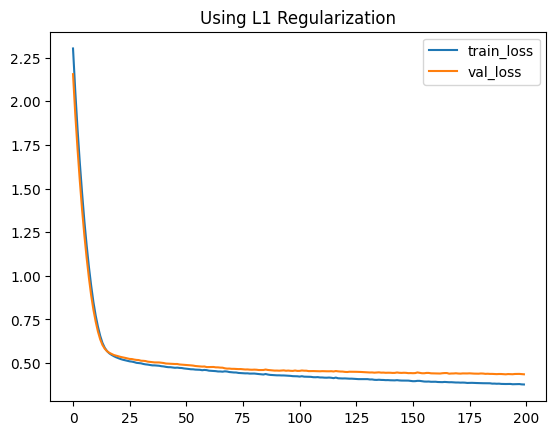

In [165]:
plt.plot(history_l1.history['loss'], label='train_loss')
plt.plot(history_l1.history['val_loss'], label='val_loss')
plt.title('Using L1 Regularization')
plt.legend()
plt.show()

### L2 Regularization

In [166]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(21,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_l2 = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 1.0195 - categorical_accuracy: 0.5701 - val_loss: 0.9410 - val_categorical_accuracy: 0.7122
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.9036 - categorical_accuracy: 0.7377 - val_loss: 0.8441 - val_categorical_accuracy: 0.7860
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8178 - categorical_accuracy: 0.7614 - val_loss: 0.7678 - val_categorical_accuracy: 0.7934
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7496 - categorical_accuracy: 0.7687 - val_loss: 0.7079 - val_categorical_accuracy: 0.8007
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6946 - categorical_accuracy: 0.7887 - val_loss: 0.6601 - val_categorical_accuracy: 0.8118
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6504 - categorical_accuracy: 0.8051 - val_loss: 0.6208 - val_categorical_accuracy: 0.8118
Epoch 7/2

18/18 [==============================] - 0s 5ms/step - loss: 0.3198 - categorical_accuracy: 0.9071 - val_loss: 0.3834 - val_categorical_accuracy: 0.8635
Epoch 51/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3160 - categorical_accuracy: 0.9035 - val_loss: 0.3785 - val_categorical_accuracy: 0.8708
Epoch 52/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3166 - categorical_accuracy: 0.9107 - val_loss: 0.3788 - val_categorical_accuracy: 0.8745
Epoch 53/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3139 - categorical_accuracy: 0.9035 - val_loss: 0.3786 - val_categorical_accuracy: 0.8635
Epoch 54/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3118 - categorical_accuracy: 0.9035 - val_loss: 0.3778 - val_categorical_accuracy: 0.8561
Epoch 55/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3103 - categorical_accuracy: 0.9071 - val_loss: 0.3786 - val_categorical_accuracy: 0.8635
Epoch 56/200
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.2578 - categorical_accuracy: 0.9326 - val_loss: 0.3372 - val_categorical_accuracy: 0.8930
Epoch 100/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2548 - categorical_accuracy: 0.9344 - val_loss: 0.3419 - val_categorical_accuracy: 0.8930
Epoch 101/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2556 - categorical_accuracy: 0.9362 - val_loss: 0.3376 - val_categorical_accuracy: 0.8930
Epoch 102/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2538 - categorical_accuracy: 0.9399 - val_loss: 0.3359 - val_categorical_accuracy: 0.8930
Epoch 103/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2528 - categorical_accuracy: 0.9290 - val_loss: 0.3362 - val_categorical_accuracy: 0.8893
Epoch 104/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2526 - categorical_accuracy: 0.9381 - val_loss: 0.3361 - val_categorical_accuracy: 0.8856
Epoch 105/20

18/18 [==============================] - 0s 5ms/step - loss: 0.2150 - categorical_accuracy: 0.9526 - val_loss: 0.3052 - val_categorical_accuracy: 0.9004
Epoch 149/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2135 - categorical_accuracy: 0.9526 - val_loss: 0.3020 - val_categorical_accuracy: 0.9114
Epoch 150/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2168 - categorical_accuracy: 0.9490 - val_loss: 0.3029 - val_categorical_accuracy: 0.9262
Epoch 151/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2133 - categorical_accuracy: 0.9508 - val_loss: 0.3040 - val_categorical_accuracy: 0.9114
Epoch 152/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2155 - categorical_accuracy: 0.9417 - val_loss: 0.2974 - val_categorical_accuracy: 0.9225
Epoch 153/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2110 - categorical_accuracy: 0.9545 - val_loss: 0.3024 - val_categorical_accuracy: 0.9188
Epoch 154/20

18/18 [==============================] - 0s 5ms/step - loss: 0.1873 - categorical_accuracy: 0.9727 - val_loss: 0.2831 - val_categorical_accuracy: 0.9373
Epoch 198/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1873 - categorical_accuracy: 0.9672 - val_loss: 0.2832 - val_categorical_accuracy: 0.9410
Epoch 199/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1857 - categorical_accuracy: 0.9763 - val_loss: 0.2821 - val_categorical_accuracy: 0.9373
Epoch 200/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1865 - categorical_accuracy: 0.9781 - val_loss: 0.2861 - val_categorical_accuracy: 0.9410


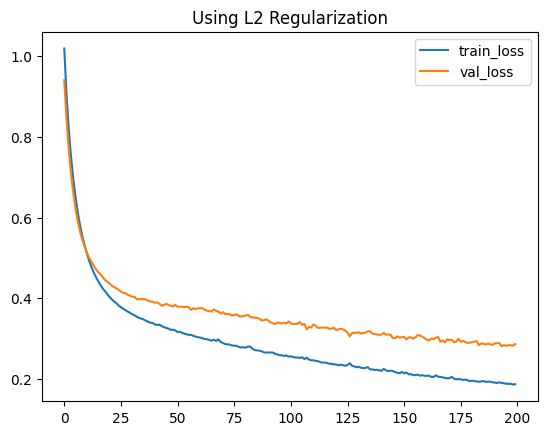

In [167]:
plt.plot(history_l2.history['loss'], label='train_loss')
plt.plot(history_l2.history['val_loss'], label='val_loss')
plt.title('Using L2 Regularization')
plt.legend()
plt.show()

### Elastic Net Regularization

In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(21,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_elastic = model.fit(X_train, y_train, epochs=200,
                            validation_data=(X_val, y_val))

Epoch 1/200
18/18 [==============================] - 1s 20ms/step - loss: 2.6616 - categorical_accuracy: 0.6576 - val_loss: 2.4956 - val_categorical_accuracy: 0.7048
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3685 - categorical_accuracy: 0.7432 - val_loss: 2.2188 - val_categorical_accuracy: 0.7712
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 2.1078 - categorical_accuracy: 0.7541 - val_loss: 1.9735 - val_categorical_accuracy: 0.7786
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 1.8765 - categorical_accuracy: 0.7851 - val_loss: 1.7547 - val_categorical_accuracy: 0.7860
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 1.6681 - categorical_accuracy: 0.8015 - val_loss: 1.5592 - val_categorical_accuracy: 0.7970
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 1.4823 - categorical_accuracy: 0.8015 - val_loss: 1.3849 - val_categorical_accuracy: 0.8155
Epoch 7/2

18/18 [==============================] - 0s 5ms/step - loss: 0.4788 - categorical_accuracy: 0.8543 - val_loss: 0.5000 - val_categorical_accuracy: 0.8303
Epoch 51/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4781 - categorical_accuracy: 0.8525 - val_loss: 0.4994 - val_categorical_accuracy: 0.8266
Epoch 52/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4773 - categorical_accuracy: 0.8470 - val_loss: 0.4986 - val_categorical_accuracy: 0.8266
Epoch 53/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4747 - categorical_accuracy: 0.8525 - val_loss: 0.4934 - val_categorical_accuracy: 0.8413
Epoch 54/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4746 - categorical_accuracy: 0.8561 - val_loss: 0.4924 - val_categorical_accuracy: 0.8413
Epoch 55/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4733 - categorical_accuracy: 0.8525 - val_loss: 0.4915 - val_categorical_accuracy: 0.8339
Epoch 56/200
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.4382 - categorical_accuracy: 0.8634 - val_loss: 0.4641 - val_categorical_accuracy: 0.8303
Epoch 100/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4367 - categorical_accuracy: 0.8616 - val_loss: 0.4625 - val_categorical_accuracy: 0.8303
Epoch 101/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4361 - categorical_accuracy: 0.8579 - val_loss: 0.4620 - val_categorical_accuracy: 0.8303
Epoch 102/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4354 - categorical_accuracy: 0.8597 - val_loss: 0.4610 - val_categorical_accuracy: 0.8303
Epoch 103/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4363 - categorical_accuracy: 0.8579 - val_loss: 0.4620 - val_categorical_accuracy: 0.8303
Epoch 104/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4358 - categorical_accuracy: 0.8616 - val_loss: 0.4587 - val_categorical_accuracy: 0.8303
Epoch 105/20

18/18 [==============================] - 0s 5ms/step - loss: 0.4139 - categorical_accuracy: 0.8652 - val_loss: 0.4460 - val_categorical_accuracy: 0.8413
Epoch 149/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4123 - categorical_accuracy: 0.8689 - val_loss: 0.4470 - val_categorical_accuracy: 0.8413
Epoch 150/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4115 - categorical_accuracy: 0.8780 - val_loss: 0.4477 - val_categorical_accuracy: 0.8450
Epoch 151/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4112 - categorical_accuracy: 0.8652 - val_loss: 0.4477 - val_categorical_accuracy: 0.8339
Epoch 152/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4101 - categorical_accuracy: 0.8725 - val_loss: 0.4462 - val_categorical_accuracy: 0.8450
Epoch 153/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4099 - categorical_accuracy: 0.8707 - val_loss: 0.4446 - val_categorical_accuracy: 0.8450
Epoch 154/20

18/18 [==============================] - 0s 5ms/step - loss: 0.3954 - categorical_accuracy: 0.8707 - val_loss: 0.4405 - val_categorical_accuracy: 0.8339
Epoch 198/200
18/18 [==============================] - 0s 6ms/step - loss: 0.3924 - categorical_accuracy: 0.8707 - val_loss: 0.4404 - val_categorical_accuracy: 0.8487
Epoch 199/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3964 - categorical_accuracy: 0.8834 - val_loss: 0.4376 - val_categorical_accuracy: 0.8487
Epoch 200/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3932 - categorical_accuracy: 0.8725 - val_loss: 0.4360 - val_categorical_accuracy: 0.8413


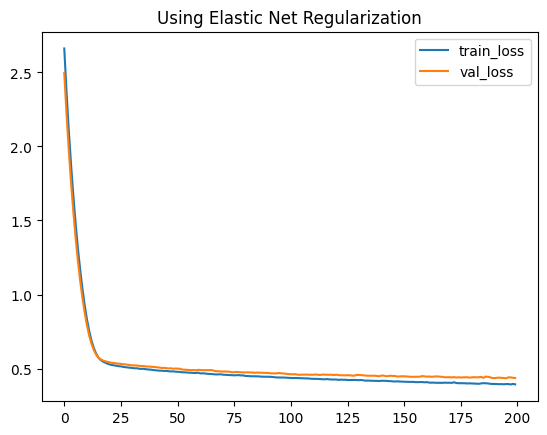

In [169]:
plt.plot(history_elastic.history['loss'], label='train_loss')
plt.plot(history_elastic.history['val_loss'], label='val_loss')
plt.title('Using Elastic Net Regularization')
plt.legend()
plt.show()

## Comparing the models

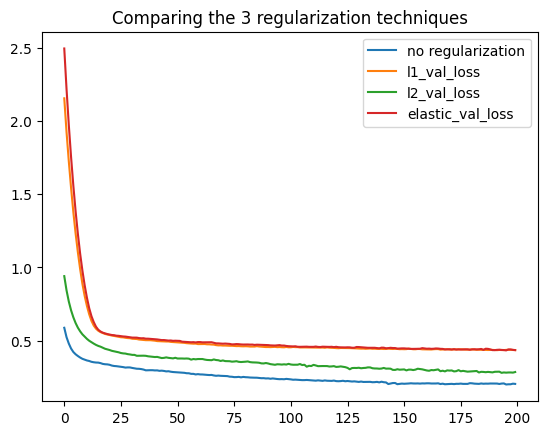

In [170]:
plt.plot(history.history['val_loss'], label='no regularization')
plt.plot(history_l1.history['val_loss'], label='l1_val_loss')
plt.plot(history_l2.history['val_loss'], label='l2_val_loss')
plt.plot(history_elastic.history['val_loss'], label='elastic_val_loss')
plt.title('Comparing the 3 regularization techniques')
plt.legend()
plt.show()

Clearly, L2 regularization does a better job at generalizing the model. This can be attributed to the fact that some features might not be contributing much to the predictions of the model.

However, in this case, using no regularization outperforms any sort of regularization that we have tried.

# End